In [1]:

import os 

In [2]:
os.getcwd()

'e:\\Mlop\\End to end\\End-to-end-Detecting-Card-Fraud\\research'

In [3]:
os.chdir("../")

In [33]:
import pickle ,joblib
import pandas as pd

In [34]:
with open("models/model.pkl","rb") as f:
    model=joblib.load(f)

print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
df=pd.read_csv("data\processed_data\preprocessed_test.csv")

In [13]:
X_test=df.drop("Class",axis=1)

In [15]:
y_test=df["Class"]

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name="LoadedModel") -> pd.DataFrame:
    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    # Store metrics
    metrics_df = pd.DataFrame([{
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }])

    # Plotting
    metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
    plt.title("Model Evaluation Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(rotation=45)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return metrics_df


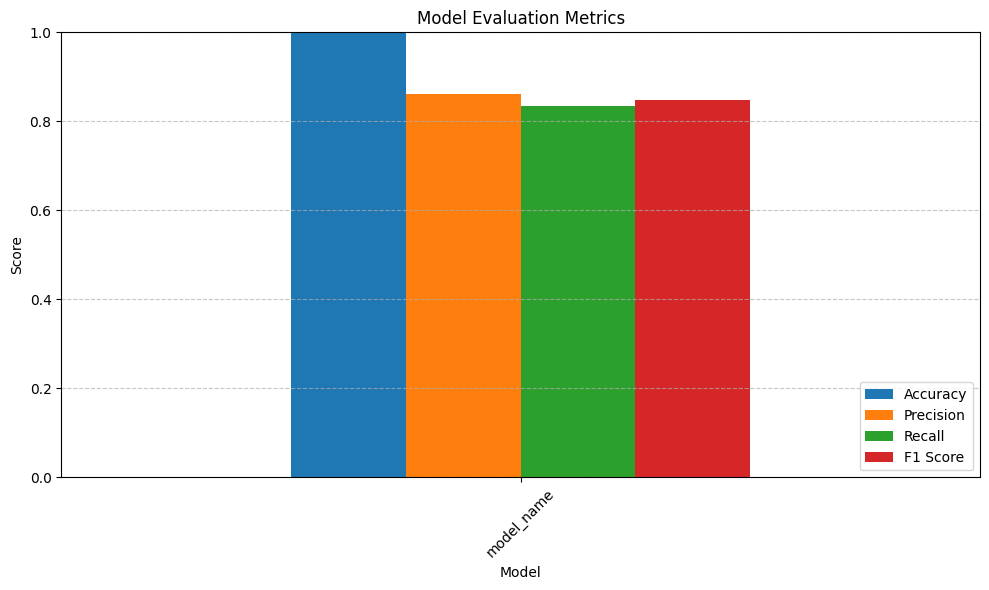

,Model,Accuracy,Precision,Recall,F1 Score
0,model_name,0.99949,0.861702,0.835052,0.848168


In [36]:
evaluate_models(model, X_test, y_test)